In [148]:
import pandas as pd

data = pd.read_csv('data/train_kaggle.csv')

# data

C:\Users\User\AppData\Local\Temp\ipykernel_31112\496437866.py:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/train_kaggle.csv')


In [112]:
# # one hot encode the categorical variables
# data = pd.get_dummies(data, columns=['outlet_city'])

# # data

In [95]:
# data.dtypes

In [149]:
data.isna().sum()   

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64

In [150]:
# drop rows where cluster_category is missing
data = data.dropna(subset=['cluster_catgeory'])

In [151]:
data.isna().sum()

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     0
dtype: int64

In [121]:
data.dtypes

Customer_ID         float64
outlet_city          object
luxury_sales         object
fresh_sales          object
dry_sales            object
cluster_catgeory     object
dtype: object

In [152]:
data['luxury_sales'] = pd.to_numeric(data['luxury_sales'], errors='coerce')
data['fresh_sales'] = pd.to_numeric(data['fresh_sales'], errors='coerce')
data['dry_sales'] = pd.to_numeric(data['dry_sales'], errors='coerce')

# convert all three columns to float
data['luxury_sales'] = data['luxury_sales'].astype(float)
data['fresh_sales'] = data['fresh_sales'].astype(float)
data['dry_sales'] = data['dry_sales'].astype(float)




In [153]:
data.shape

(774154, 6)

In [154]:
data.isna().sum()

Customer_ID          2
outlet_city          2
luxury_sales        45
fresh_sales         50
dry_sales           38
cluster_catgeory     0
dtype: int64

In [155]:
# drop na values
data = data.dropna()

data.shape

(774039, 6)

In [156]:
data['total_sales'] = data['luxury_sales'] + data['fresh_sales'] + data['dry_sales']

In [157]:
data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,7257.60
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,8657.32
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,12925.44
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,13114.36
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,13659.03


In [158]:
# get distinct values of Customer_ID
data['cluster_catgeory'].unique().tolist()

['4',
 '1',
 '99',
 '2',
 '5',
 '3',
 '6',
 '6\\',
 4,
 2,
 1,
 95,
 3,
 98,
 5,
 6,
 100.0,
 89.0]

In [159]:
data['cluster_catgeory'].value_counts()

cluster_catgeory
1        188947
6        169195
2        155033
4        131026
3         48887
4         41398
5         39516
5             9
1             9
6             8
2             4
3             1
6\            1
95            1
98            1
99            1
100.0         1
89.0          1
Name: count, dtype: int64

In [160]:
# Convert the 'cluster_catgeory' column to numeric, coercing errors to NaN
data['cluster_catgeory'] = pd.to_numeric(data['cluster_catgeory'], errors='coerce')

# Drop rows with NaN values in the 'cluster_catgeory' column
data = data.dropna(subset=['cluster_catgeory'])

# Convert the 'cluster_catgeory' column to integers
data['cluster_catgeory'] = data['cluster_catgeory'].astype(int)

# Define the valid categories
valid_categories = [1, 2, 3, 4, 5, 6]

# Filter the rows to keep only those with valid categories
data = data[data['cluster_catgeory'].isin(valid_categories)]

# Get the number of occurrences for each distinct value in the 'cluster_catgeory' column
occurrences = data['cluster_catgeory'].value_counts()

# Print the occurrences
print(occurrences)


cluster_catgeory
1    188956
4    172424
6    169203
2    155037
3     48888
5     39525
Name: count, dtype: int64


In [161]:
data.shape

(774033, 7)

In [162]:
import numpy as np

In [163]:
data['luxury_sales_ratio'] = data['luxury_sales'] / data['total_sales']
data['fresh_sales_ratio'] = data['fresh_sales'] / data['total_sales']
data['dry_sales_ratio'] = data['dry_sales'] / data['total_sales']

# Logarithmic Sales
data['log_luxury_sales'] = np.log(data['luxury_sales'] + 1)
data['log_fresh_sales'] = np.log(data['fresh_sales'] + 1)
data['log_dry_sales'] = np.log(data['dry_sales'] + 1)
data['log_total_sales'] = np.log(data['total_sales'] + 1)

# Sales Ratios
data['luxury_to_fresh_ratio'] = data['luxury_sales'] / data['fresh_sales']
data['luxury_to_dry_ratio'] = data['luxury_sales'] / data['dry_sales']
data['fresh_to_dry_ratio'] = data['fresh_sales'] / data['dry_sales']

# Interaction Terms
data['luxury_fresh_interaction'] = data['luxury_sales'] * data['fresh_sales']
data['luxury_dry_interaction'] = data['luxury_sales'] * data['dry_sales']
data['fresh_dry_interaction'] = data['fresh_sales'] * data['dry_sales']

In [164]:
data

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,log_luxury_sales,log_fresh_sales,log_dry_sales,log_total_sales,luxury_to_fresh_ratio,luxury_to_dry_ratio,fresh_to_dry_ratio,luxury_fresh_interaction,luxury_dry_interaction,fresh_dry_interaction
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,7257.60,0.166667,0.104167,0.729167,7.098871,6.629363,8.574140,8.889942,1.600000,0.228571,0.142857,9.144576e+05,6.401203e+06,4.000752e+06
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,8657.32,0.183673,0.122449,0.693878,7.372193,6.967043,8.700867,9.066276,1.500000,0.264706,0.176471,1.685654e+06,9.552042e+06,6.368028e+06
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,12925.44,0.177083,0.114583,0.708333,7.736255,7.301175,9.122221,9.467030,1.545455,0.250000,0.161765,3.389923e+06,2.095589e+07,1.355969e+07
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,13114.36,0.173469,0.132653,0.693878,7.730148,7.462020,9.116113,9.481539,1.307692,0.250000,0.191176,3.957622e+06,2.070141e+07,1.583049e+07
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,13659.03,0.171717,0.151515,0.676768,7.760676,7.635570,9.131837,9.522229,1.133333,0.253731,0.223881,4.854109e+06,2.168169e+07,1.913090e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3,11235.24,0.346535,0.346535,0.306931,8.267295,8.267295,8.145967,9.326900,1.000000,1.129032,1.129032,1.515856e+07,1.342616e+07,1.342616e+07
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3,17929.00,0.340000,0.310000,0.350000,8.715529,8.623172,8.744512,9.794231,1.096774,0.971429,0.885714,3.388073e+07,3.825244e+07,3.487722e+07
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3,14611.11,0.350515,0.329897,0.319588,8.541382,8.480770,8.449028,9.589606,1.062500,1.096774,1.032258,2.468606e+07,2.391462e+07,2.250788e+07
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3,18564.00,0.340000,0.340000,0.320000,8.750328,8.750328,8.689714,9.829033,1.000000,1.062500,1.062500,3.983831e+07,3.749488e+07,3.749488e+07


c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


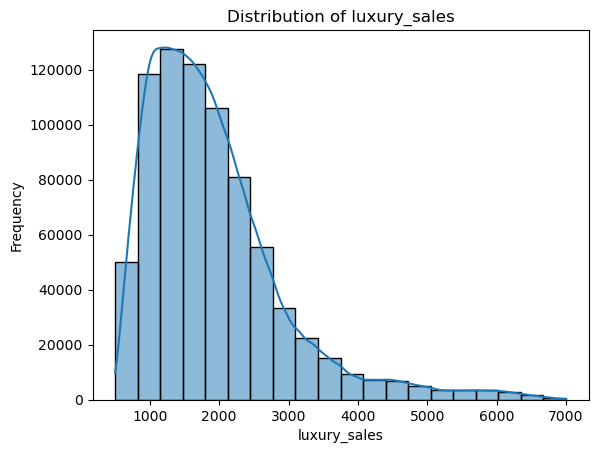

In [165]:
# create bell plot for luxury_sales
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a histogram of 'luxury_sales' with 20 bins
sns.histplot(data['luxury_sales'], bins=20, kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of luxury_sales')
ax.set_xlabel('luxury_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


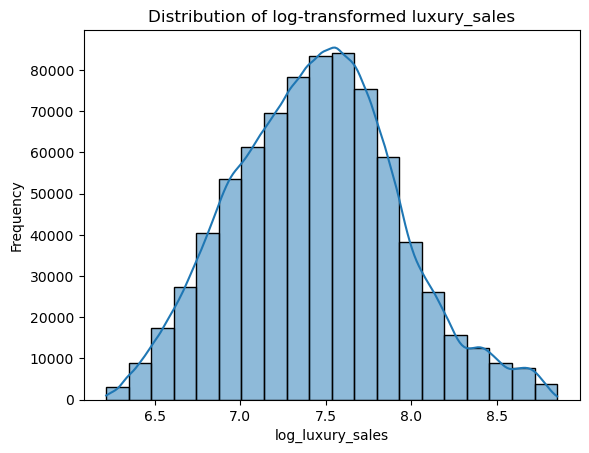

In [171]:
# Plot a histogram of 'log_luxury_sales' with 20 bins
fig, ax = plt.subplots()
sns.histplot(data['log_luxury_sales'], bins=20, kde=True, ax=ax)


# Set the title and labels
ax.set_title('Distribution of log-transformed luxury_sales')
ax.set_xlabel('log_luxury_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


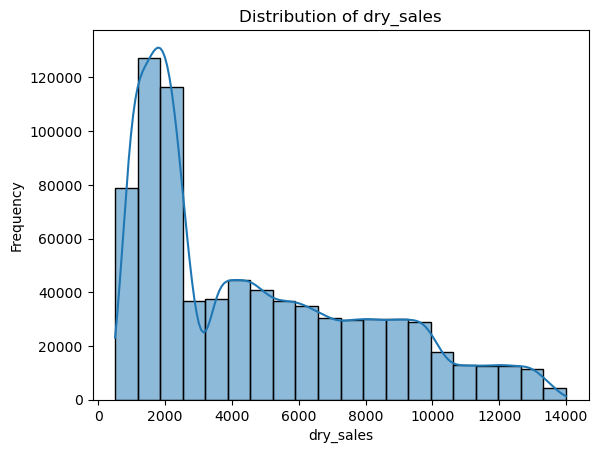

In [166]:
# create bell plot for dry_sales
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a histogram of 'dry_sales' with 20 bins
sns.histplot(data['dry_sales'], bins=20, kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of dry_sales')
ax.set_xlabel('dry_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


c:\Users\User\miniconda3\envs\featuren\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


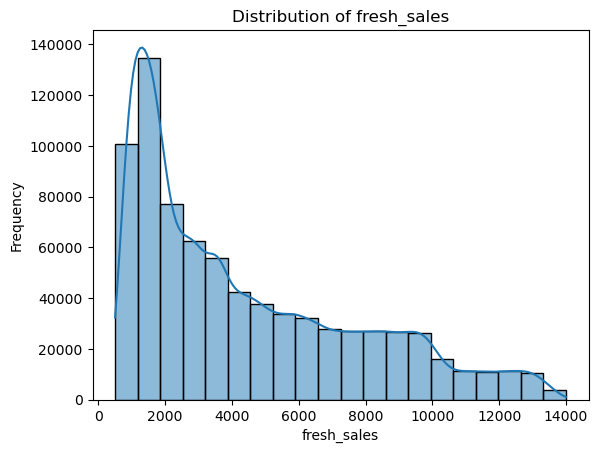

In [167]:
# create bell plot for fresh_sales
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a histogram of 'fresh_sales' with 20 bins
sns.histplot(data['fresh_sales'], bins=20, kde=True, ax=ax)

# Set the title and labels
ax.set_title('Distribution of fresh_sales')
ax.set_xlabel('fresh_sales')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


In [168]:
data

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,log_luxury_sales,log_fresh_sales,log_dry_sales,log_total_sales,luxury_to_fresh_ratio,luxury_to_dry_ratio,fresh_to_dry_ratio,luxury_fresh_interaction,luxury_dry_interaction,fresh_dry_interaction
0,10493832.0,Kelaniya,1209.60,756.00,5292.00,4,7257.60,0.166667,0.104167,0.729167,7.098871,6.629363,8.574140,8.889942,1.600000,0.228571,0.142857,9.144576e+05,6.401203e+06,4.000752e+06
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1,8657.32,0.183673,0.122449,0.693878,7.372193,6.967043,8.700867,9.066276,1.500000,0.264706,0.176471,1.685654e+06,9.552042e+06,6.368028e+06
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4,12925.44,0.177083,0.114583,0.708333,7.736255,7.301175,9.122221,9.467030,1.545455,0.250000,0.161765,3.389923e+06,2.095589e+07,1.355969e+07
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4,13114.36,0.173469,0.132653,0.693878,7.730148,7.462020,9.116113,9.481539,1.307692,0.250000,0.191176,3.957622e+06,2.070141e+07,1.583049e+07
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4,13659.03,0.171717,0.151515,0.676768,7.760676,7.635570,9.131837,9.522229,1.133333,0.253731,0.223881,4.854109e+06,2.168169e+07,1.913090e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.40,3893.40,3448.44,3,11235.24,0.346535,0.346535,0.306931,8.267295,8.267295,8.145967,9.326900,1.000000,1.129032,1.129032,1.515856e+07,1.342616e+07,1.342616e+07
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3,17929.00,0.340000,0.310000,0.350000,8.715529,8.623172,8.744512,9.794231,1.096774,0.971429,0.885714,3.388073e+07,3.825244e+07,3.487722e+07
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3,14611.11,0.350515,0.329897,0.319588,8.541382,8.480770,8.449028,9.589606,1.062500,1.096774,1.032258,2.468606e+07,2.391462e+07,2.250788e+07
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3,18564.00,0.340000,0.340000,0.320000,8.750328,8.750328,8.689714,9.829033,1.000000,1.062500,1.062500,3.983831e+07,3.749488e+07,3.749488e+07


In [169]:
# one hot encode the 
data = pd.get_dummies(data, columns=['outlet_city'])

data.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,log_luxury_sales,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,10493832.0,1209.60,756.00,5292.00,4,7257.60,0.166667,0.104167,0.729167,7.098871,...,False,True,False,False,False,False,False,False,False,False
1,10178643.0,1590.12,1060.08,6007.12,1,8657.32,0.183673,0.122449,0.693878,7.372193,...,False,False,False,True,False,False,False,False,False,False
2,10513916.0,2288.88,1481.04,9155.52,4,12925.44,0.177083,0.114583,0.708333,7.736255,...,False,False,False,False,False,False,False,False,False,True
3,10334589.0,2274.94,1739.66,9099.76,4,13114.36,0.173469,0.132653,0.693878,7.730148,...,False,False,False,False,False,False,False,False,False,True
4,10458365.0,2345.49,2069.55,9243.99,4,13659.03,0.171717,0.151515,0.676768,7.760676,...,False,True,False,False,False,False,False,False,False,False


In [173]:
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)

data.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,log_luxury_sales,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,10493832.0,1209.60,756.00,5292.00,4,7257.60,0.166667,0.104167,0.729167,7.098871,...,0,1,0,0,0,0,0,0,0,0
1,10178643.0,1590.12,1060.08,6007.12,1,8657.32,0.183673,0.122449,0.693878,7.372193,...,0,0,0,1,0,0,0,0,0,0
2,10513916.0,2288.88,1481.04,9155.52,4,12925.44,0.177083,0.114583,0.708333,7.736255,...,0,0,0,0,0,0,0,0,0,1
3,10334589.0,2274.94,1739.66,9099.76,4,13114.36,0.173469,0.132653,0.693878,7.730148,...,0,0,0,0,0,0,0,0,0,1
4,10458365.0,2345.49,2069.55,9243.99,4,13659.03,0.171717,0.151515,0.676768,7.760676,...,0,1,0,0,0,0,0,0,0,0


# Model

In [186]:
data

,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,total_sales,luxury_sales_ratio,fresh_sales_ratio,dry_sales_ratio,log_luxury_sales,log_fresh_sales,...,outlet_city_Katunayake,outlet_city_Kelaniya,outlet_city_Kotte,outlet_city_Moratuwa,outlet_city_Negombo,outlet_city_Nuwara Eliya,outlet_city_Panadura,outlet_city_Peliyagoda,outlet_city_Trincomalee,outlet_city_Wattala
0,1209.60,756.00,5292.00,4,7257.60,0.166667,0.104167,0.729167,7.098871,6.629363,...,0,1,0,0,0,0,0,0,0,0
1,1590.12,1060.08,6007.12,1,8657.32,0.183673,0.122449,0.693878,7.372193,6.967043,...,0,0,0,1,0,0,0,0,0,0
2,2288.88,1481.04,9155.52,4,12925.44,0.177083,0.114583,0.708333,7.736255,7.301175,...,0,0,0,0,0,0,0,0,0,1
3,2274.94,1739.66,9099.76,4,13114.36,0.173469,0.132653,0.693878,7.730148,7.462020,...,0,0,0,0,0,0,0,0,0,1
4,2345.49,2069.55,9243.99,4,13659.03,0.171717,0.151515,0.676768,7.760676,7.635570,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774150,3893.40,3893.40,3448.44,3,11235.24,0.346535,0.346535,0.306931,8.267295,8.267295,...,0,0,0,0,0,0,0,0,0,0
774151,6095.86,5557.99,6275.15,3,17929.00,0.340000,0.310000,0.350000,8.715529,8.623172,...,1,0,0,0,0,0,0,0,0,0
774152,5121.42,4820.16,4669.53,3,14611.11,0.350515,0.329897,0.319588,8.541382,8.480770,...,0,0,0,0,0,0,0,0,0,0
774153,6311.76,6311.76,5940.48,3,18564.00,0.340000,0.340000,0.320000,8.750328,8.750328,...,0,0,0,0,0,0,0,0,0,0


In [177]:
#model 1 - with all features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load your data into a DataFrame (assuming it is already loaded as 'data')

# Drop the 'Customer_ID' column
# data = data.drop(columns=['Customer_ID'])

# Separate features and target variable
X = data.drop(columns=['cluster_catgeory'])
y = data['cluster_catgeory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the entire dataset
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

with open('rf_classifier_model_1.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)


Accuracy: 0.9997739120324016
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30986
           3       1.00      1.00      1.00      9700
           4       1.00      1.00      1.00     34402
           5       1.00      1.00      1.00      7939
           6       1.00      1.00      1.00     33869

    accuracy                           1.00    154807
   macro avg       1.00      1.00      1.00    154807
weighted avg       1.00      1.00      1.00    154807



In [ ]:
with open('rf_classifier_model_1.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

In [178]:
# model 2 - with log features and outlet_city features

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import StandardScaler


# Drop the 'Customer_ID' column
# data = data.drop(columns=['Customer_ID'])

# get columns starts with "outlet_city" in column names
outlet_city_columns = [col for col in data.columns if 'outlet_city' in col]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['cluster_catgeory']))

# Separate features and target variable
X = data[['log_total_sales', 'log_luxury_sales', 'log_fresh_sales', 'log_dry_sales'] + outlet_city_columns]
y = data['cluster_catgeory']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the entire dataset
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


with open('rf_classifier_model_2.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

Accuracy: 0.9997803716886188
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37911
           2       1.00      1.00      1.00     30986
           3       1.00      1.00      1.00      9700
           4       1.00      1.00      1.00     34402
           5       1.00      1.00      1.00      7939
           6       1.00      1.00      1.00     33869

    accuracy                           1.00    154807
   macro avg       1.00      1.00      1.00    154807
weighted avg       1.00      1.00      1.00    154807



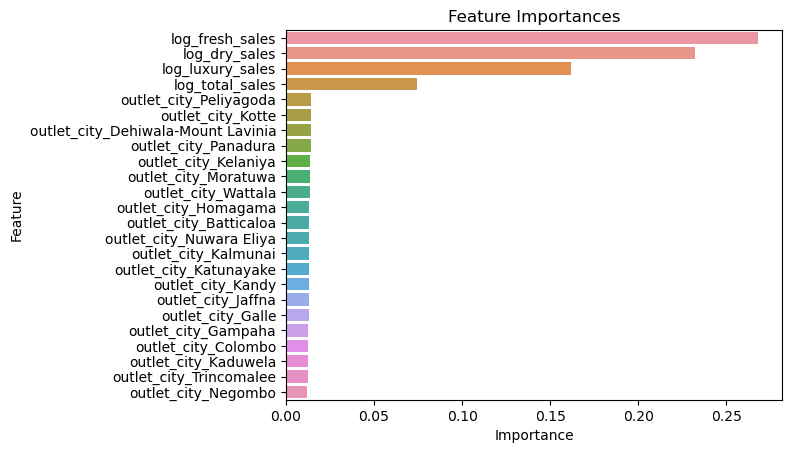

In [185]:
# get feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf_classifier.feature_importances_

# Get the indices of the features sorted by importance
indices = importances.argsort()[::-1]

# Get the feature names
feature_names = X.columns

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the feature importances
sns.barplot(x=importances[indices], y=feature_names[indices], ax=ax)

# Set the title and labels
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the plot
plt.show()

In [184]:
y

0         4
1         1
2         4
3         4
4         4
         ..
774150    3
774151    3
774152    3
774153    3
774154    3
Name: cluster_catgeory, Length: 774033, dtype: int32